<a href="https://colab.research.google.com/github/dhivya4/Inceptz/blob/main/IncomeEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/balaji2v/Inceptez_Batch19/main/income_evaluation.csv")

In [3]:
df.shape

(32561, 15)

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


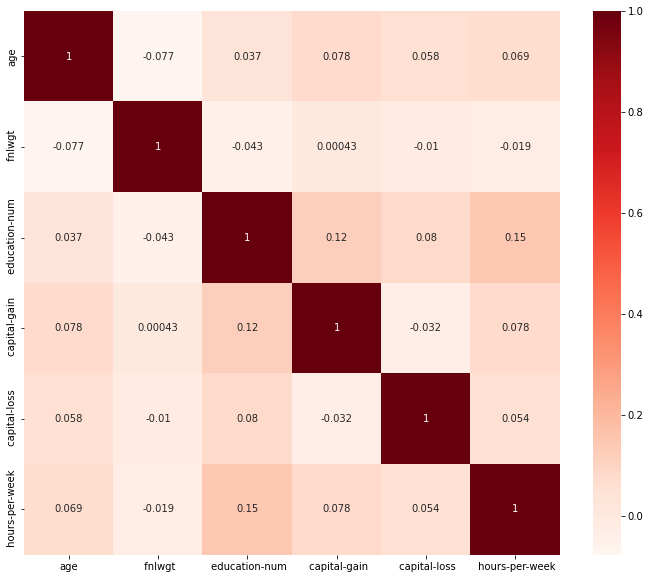

In [7]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
for var in df.columns:
    
    print(df[var].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name:  fnlwgt, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: i

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print(df.keys())

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [13]:
df[' workclass'] = df[' workclass'].replace('?','Private')
df[' occupation'] = df[' occupation'].replace('?','Prof-specialty')


In [14]:
cols = ['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income']

In [15]:
from sklearn.preprocessing import LabelEncoder
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [17]:
X = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
Y = df[[' income']]

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [20]:
X_train_scaler = sc.fit(X_train)
X_train_trans_scaler = sc.fit_transform(X_train)

In [21]:
X_train_trans_scaler

array([[ 0.39597328,  0.77372722, -1.37638144, ..., -0.20446314,
         1.61085874,  0.29254012],
       [-1.21499724,  0.08853505,  0.53787154, ..., -0.20446314,
        -0.85129773,  0.29254012],
       [-1.28822318, -2.6522336 ,  0.43532522, ..., -0.20446314,
        -0.44093832,  0.29254012],
       ...,
       [-0.84886758,  0.08853505, -1.03263693, ..., -0.20446314,
        -0.03057891, -4.64490339],
       [ 1.49436227,  2.14411154,  1.07830056, ..., -0.20446314,
        -0.03057891,  0.29254012],
       [-0.40951198,  0.08853505, -1.40885994, ...,  4.46738999,
         0.37978051,  0.29254012]])

In [22]:
X_train_trans_scaler.size

319088

In [23]:
X_test_trans_scaler = sc.transform(X_test)

X_test_trans_scaler.size

136766

In [24]:
gnb = GaussianNB()
knn = KNeighborsClassifier()

In [25]:
#fitting models and checking for classification metrics
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
for i in [gnb,knn]:
  i.fit(X_train,Y_train)
  pred = i.predict(X_test)
  test_score = accuracy_score(Y_test,pred)
  train_score = accuracy_score(Y_train,i.predict(X_train))
  print(i)
  print('Accuracy score for train data', accuracy_score(Y_test,pred))
  print('Accuracy score for test data', accuracy_score(Y_train,i.predict(X_train)))
  print(classification_report(Y_test,pred))
  print(confusion_matrix(Y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GaussianNB()
Accuracy score for train data 0.8232162964479476
Accuracy score for test data 0.8179185679185679
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7550
           1       0.66      0.45      0.54      2219

    accuracy                           0.82      9769
   macro avg       0.76      0.69      0.71      9769
weighted avg       0.81      0.82      0.81      9769

[[7034  516]
 [1211 1008]]
KNeighborsClassifier()
Accuracy score for train data 0.7802231548776742
Accuracy score for test data 0.8364777114777114
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      7550
           1       0.52      0.37      0.43      2219

    accuracy                           0.78      9769
   macro avg       0.68      0.63      0.65      9769
weighted avg       0.76      0.78      0.77      9769

[[6806  744]
 [1403  816]]
